# Решение задач линейной алгебры
Для решения задач линейной алгебры в SciPy предназначен модуль scipy.linalg. Продемонстрируем некоторые возможности модуля на примерах.
Пример 1.1. Решить систему линейных уравнений 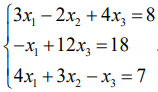

In [3]:
import numpy as np
from scipy.linalg import *
A = np.array([
 [3,-2,4],
 [-1,0,12],
 [4,3,-1]
])
b = np.array([8,18,7]).reshape(3,1)
x=solve(A,b)
print(f'{x=}')

x=array([[1.28971963],
       [1.14953271],
       [1.60747664]])


Пример 1.2. Вычислить обратную матрицу для матрицы 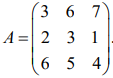

In [4]:
from scipy.linalg import *
A = [
 [3,6,7],
 [2,3,1],
 [6,5,4]
]
B = inv(A)
print(f'{B=}')

B=array([[-0.14893617, -0.23404255,  0.31914894],
       [ 0.04255319,  0.63829787, -0.23404255],
       [ 0.17021277, -0.44680851,  0.06382979]])


Проверить полученный результат можно методом .dot. Результат перемножения матриц A и B – единичная матрица:

In [5]:
import numpy as np
from scipy.linalg import *
A = np.array([
 [3,6,7],
 [2,3,1],
 [6,5,4]
])
B = inv(A)
C = A.dot(B) # произведение матриц А и В
print(f'{C=}')

C=array([[ 1.00000000e+00,  1.11022302e-16, -1.38777878e-17],
       [-5.55111512e-17,  1.00000000e+00, -4.16333634e-17],
       [-1.11022302e-16,  4.44089210e-16,  1.00000000e+00]])


Пример 1.3. Найти определитель матрицы A

In [6]:
import numpy as np
from scipy import linalg
A = np.array([
 [3,6,7],
 [2,3,1],
 [6,5,4]])
B = linalg.det(A)
print(B)

-47.0


Пример 1.4. Найти собственные значения и нормированные собственные вектора матрицы 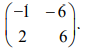

In [8]:
import numpy as np; from scipy import linalg
A = np.array([[-1, -6], [2, 6]])
linalg.eig(A)


(array([2.+0.j, 3.+0.j]),
 array([[-0.89442719,  0.83205029],
        [ 0.4472136 , -0.5547002 ]]))

# Решение нелинейных уравнений и систем нелинейных  
Для решения уравнений и систем уравнений в SciPy можно использовать функцию root(), имеющую следующий синтаксис:
scipy.optimize.root(fun, x0, args=(), method='hybr', jac=None, tol=None, callback=None, options=None).
Описание: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html
Рассмотрим пример применения функции root() для решения примера 2.2 с выбором метода решения по умолчанию:
image.png


In [9]:
import scipy.optimize
import numpy as np
def f(x):
 return x**3*np.log(x) - 6*x*np.sin(x)-12
z = scipy.optimize.root(f, x0=3)
print(z)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 3.553e-15]
       x: [ 2.685e+00]
    nfev: 8
    fjac: [[-1.000e+00]]
       r: [-4.037e+01]
     qtf: [-2.620e-09]


Изменив метод решения с 'hybr' (по умолчанию), к примеру, на 'broyden1' (z = scipy.optimize.root(f, x0=3,method='broyden1')), мы получим ответ в несколько ином виде:

In [10]:
import scipy.optimize
import numpy as np
def f(x):
 return x**3*np.log(x) - 6*x*np.sin(x)-12
z = scipy.optimize.root(f, x0=3, method='broyden1')
print(z)

 message: A solution was found at the specified tolerance.
 success: True
  status: 1
     fun: [ 4.511e-09]
       x: 2.6846153217119144
     nit: 8


Решить уравнение (в том числе и трансцендентное) f(x) = 0 в Python можно с помощью функции fsolve(), обязательными параметрами которой являются функция f и начальное приближение х.
Если начальное приближение неизвестно, можно, как было показано в подразд. 2.1, построить график функции y = f(x) и определить отрезок, на котором отделен корень уравнения. Функция fsolve() имеет следующий синтаксис:
fsolve(func, x0, args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None).
Описание: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html
Покажем, как можно решить пример 2.2 с помощью функции fsolve(), использовав минимальное число входных аргументов. Код для решения задачи:

In [11]:
import scipy.optimize; import numpy as np
def f(x): return x**3*np.log(x) - 6*x*np.sin(x)-12
z = scipy.optimize.fsolve(f, x0=3)
print(z)

[2.68461532]


Если мы хотим получить больше информации о решении, нужно добавить в функцию fsolve() еще один параметр: full_output=True. В результате работы измененной программы получим словарь:

In [12]:
import scipy.optimize; import numpy as np
def f(x): return x**3*np.log(x) - 6*x*np.sin(x)-12
z = scipy.optimize.fsolve(f, x0=3, full_output=True)
print(z)

(array([2.68461532]), {'nfev': 8, 'fjac': array([[-1.]]), 'r': array([-40.36665546]), 'qtf': array([-2.61953303e-09]), 'fvec': array([3.55271368e-15])}, 1, 'The solution converged.')


Пример 2.3. Решить систему нелинейных уравнений 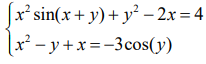 с помощью функций root() и fsolve().
Решение систем нелинейных уравнений, как правило, очень чувствительно к выбору начального приближения. Выберем его, построив графики функций. В Python это можно сделать с помощью функции библиотеки SymPy plot_implicit().

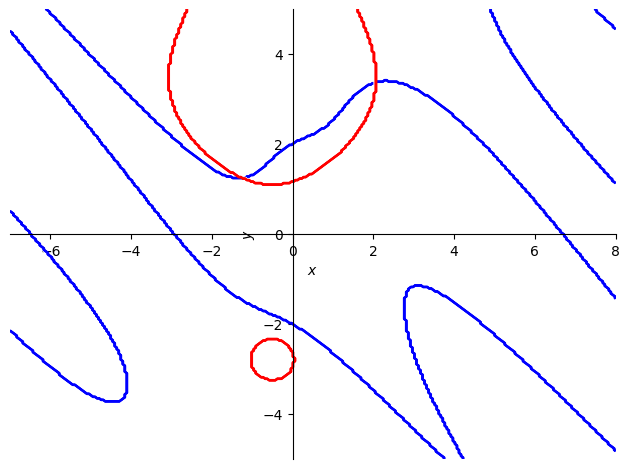

In [14]:
from sympy import *
x, y = symbols('x y')
p1 = plot_implicit(Eq(x**2*sin(x+y)+y**2-2*x,4),(x, -7, 8),adaptive=False,show=False)
p2=plot_implicit(Eq(x**2-y+x,-3*cos(y)),(x, -7, 8),adaptive=False,show=False,line_color='red')
p1.append(p2[0])
p1.show()

Поскольку библиотека SymPy предназначена для работы с символьными переменными, объявляем переменные x и y символьными. Для создания уравнений с символьными переменными в SymPy используют функцию Eq(). Она содержит два параметра: левую и правую части уравнения. Далее создаются объект p1 с графиком первой кривой и объект p2 с графиком второй кривой. Задаются пределы изменения аргумента х: (x, −7, 8). Значения y функция plot_implicit() определяет сама из решения соответствующего уравнения. Чтобы задать разный цвет кривых, графики пока не выводим на экран. После того как в одной из команд plot_implicit() мы изменили цвет графика, добавляем один график к другому и выводим их в одно графическое окно. Параметр adaptive позволяет увеличить толщину линий графика. Из графика видно, что на интервале [−7,8] система уравнений имеет два решения. Найдем одно из них, выбрав в качестве начального приближения вектор [−1, 1].
В иллюстративных целях приведем решение задачи с помощью функции root() с использованием якобиана, а с помощью функции fsolve() – без его явного задания.
Вычислим якобиан: 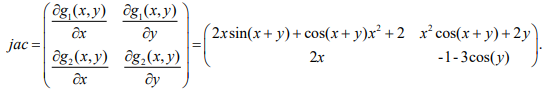

In [15]:
from scipy import optimize; import numpy as np
def fun(x):
  return [x[0]**2*np.sin(x[0]+x[1])+ x[1]**2-2*x[0]-4,
 x[0]**2-x[1]+x[0]+3*np.cos(x[1])]
def jac(x):
  return np.array([[2*x[0]*np.sin(x[0]+x[1])+\
                   np.cos(x[0]+x[1])*x[0]**2+2,
 x[0]**2*np.cos(x[0]+x[1])+2*x[1]],
 [2*x[0],
 -1-3*np.cos(x[1])]])
sol = optimize.root(fun, [-1, 1], jac=jac, method='hybr')
print("Решение системы уравнений: x= %.6f y=%.6f" %
 (sol.x[0],sol.x[1]))
print("Значение левой части первого уравнения равно %.12f"
% sol.fun[0])
print("Значение левой части второго уравнения равно %.12f"
% sol.fun[1])
print("Количество итераций: %i" % sol.nfev)


Решение системы уравнений: x= -1.215009 y=1.238860
Значение левой части первого уравнения равно 0.000000000000
Значение левой части второго уравнения равно -0.000000000000
Количество итераций: 10


*Комментарий к коду*. Определяем функцию fun(), в которой задаем левые части каждого из уравнений. С помощью функции jac вычисляем ее якобиан. Решаем задачу методом 'hybr' с начальным приближением [−1,1], найденным из графика (рис. 2.6). Выводим на экран решение системы уравнений, значения левых частей каждого уравнения и количество итераций.
Решим ту же задачу с помощью функции fsolve(). Код программы:

In [19]:
import scipy.optimize; import numpy as np
def g(z):
  x=z[0];y=z[1]
  f=np.zeros(2)
  f[0]=x**2*np.sin(x+y)+y**2-2*x-4
  f[1]=x**2-y+x+3*np.cos(y)
  return f
z=scipy.optimize.fsolve(g,[-1,1])
print("Решение системы уравнений: x= %.6f y=%.6f" %
 (z[0],z[1]))
print("Значение левой части первого уравнения равно %.12f "% g(z)[0])
print("Значение левой части второго уравнения равно %.12f "% g(z)[1])


Решение системы уравнений: x= -1.215009 y=1.238860
Значение левой части первого уравнения равно -0.000000000007 
Значение левой части второго уравнения равно 0.000000000006 


# Решение систем линейных алгебраических уравнений
Решим следующую СЛАУ: 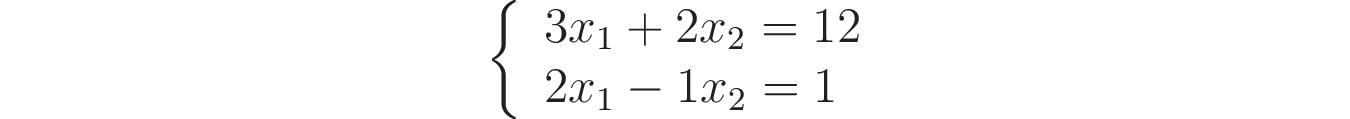

In [23]:
import numpy as np
from scipy import linalg
A = np.array([[3, 2], [2, -1],])
b = np.array([[12], [1]])
x = linalg.solve(A, b)
print(f'{x=}')
print('Проверка:')
print(np.dot(A,x)-b)

x=array([[2.],
       [3.]])
Проверка:
[[ 0.0000000e+00]
 [-8.8817842e-16]]


Источники:
1. Титов А. Н. Решение задач линейной алгебры и прикладной математики в Python. Работа с библиотекой SciPy : учебно-методическое пособие / А. Н. Титов, Р. Ф. Тазиева; Минобрнауки России, Казан. нац. исслед. технол. ун-т. – Казань : Изд-во КНИТУ, 2023. – 124 с.
1.  Как работать с линейными системами в Python с помощью scipy.linalg. URL: https://proglib.io/p/kak-rabotat-s-lineynymi-sistemami-v-python-s-pomoshchyu-scipy-linalg-2023-02-27